In [2]:
import pandas as pd

In [3]:
movies=pd.read_csv(r"C:\Users\hp\Downloads\archive\movie.csv")
print(type(movies))
movies.head(10)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
ratings = pd.read_csv(r"C:\Users\hp\Downloads\archive\rating.csv")

In [5]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [6]:
tags= pd.read_csv(r"C:\Users\hp\Downloads\archive\tag.csv")
tags.head(10)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
5,65,668,bollywood,2013-05-10 01:37:56
6,65,898,screwball comedy,2013-05-10 01:42:40
7,65,1248,noir thriller,2013-05-10 01:39:43
8,65,1391,mars,2013-05-10 01:40:55
9,65,1617,neo-noir,2013-05-10 01:43:37


In [7]:
movies.shape

(27278, 3)

In [8]:
ratings.shape

(20000263, 4)

In [9]:
tags.shape

(465564, 4)

In [10]:
print(tags.columns)
print(ratings.columns)

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [11]:
#For current analysis, we will remove timestamp
del ratings['timestamp']
del tags['timestamp']

In [12]:
print(tags.columns)
print(ratings.columns)

Index(['userId', 'movieId', 'tag'], dtype='object')
Index(['userId', 'movieId', 'rating'], dtype='object')


## Data structure

### - series

In [13]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [16]:
row_0 = tags.iloc[0] #Purely integer-location based indexing for selection by position
print(type(row_0))
print(row_0)

<class 'pandas.core.series.Series'>
userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [17]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [18]:
row_0['userId']

18

In [19]:
row_0['movieId']

4141

In [20]:
row_0['tag']

'Mark Waters'

In [21]:
'rating' in row_0

False

In [27]:
'tag' in row_0

True

In [28]:
row_0.name

0

In [29]:
row_0 = row_0.rename("firstRow")
row_0.name

'firstRow'

## DataFrames

In [30]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [31]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [32]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [35]:
tags.iloc[[0,11,300]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
300,316,45186,Ethan Hunt Should Stop Hogging The Screen!


## Descriptive statistics

In [36]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [38]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [39]:
ratings['rating'].mean()

3.5255285642993797

In [40]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [41]:
ratings['rating'].min()

0.5

In [42]:
ratings.min()

userId     1.0
movieId    1.0
rating     0.5
dtype: float64

In [43]:
ratings['rating'].max()

5.0

In [44]:
ratings.max()

userId     138493.0
movieId    131262.0
rating          5.0
dtype: float64

In [45]:
ratings['rating'].std()

1.0519889192942424

In [46]:
ratings.std()

userId     40038.626653
movieId    19789.477445
rating         1.051989
dtype: float64

In [47]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [48]:
ratings.mode()

,userId,movieId,rating
0,118205,296,4.0


In [49]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [55]:
filter1 = ratings['rating']>10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [53]:
filter2= ratings['rating']>0
filter2.all()

True

## Data Cleaning: Handling Missing Data

In [56]:
movies.shape

(27278, 3)

In [58]:
movies.isnull().any().all()

False

In [59]:
ratings.shape

(20000263, 3)

In [61]:
ratings.isnull().any().all()

False

In [62]:
tags.shape

(465564, 3)

In [63]:
tags.isnull().any().any()

True

In [64]:
tags = tags.dropna() #Remove missing values.

In [65]:
tags.isnull().any().any()

False

In [66]:
tags.shape

(465548, 3)

## Data Visulization

In [67]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

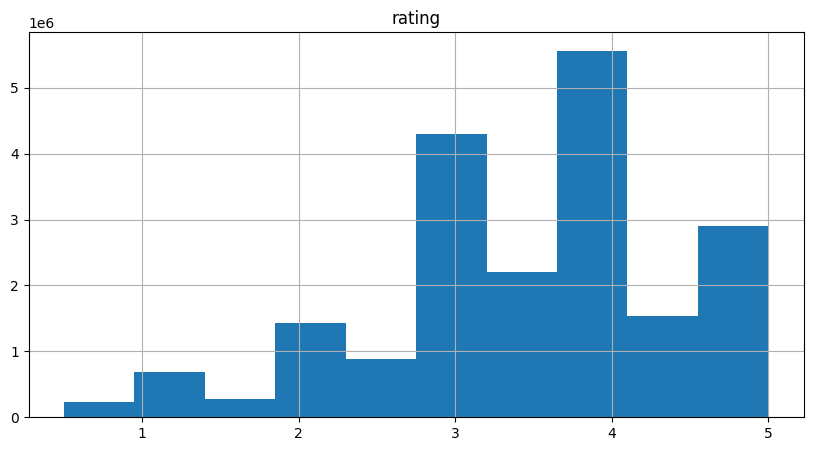

In [70]:
%matplotlib inline
ratings.hist(column = 'rating', figsize=(10,5))

<Axes: >

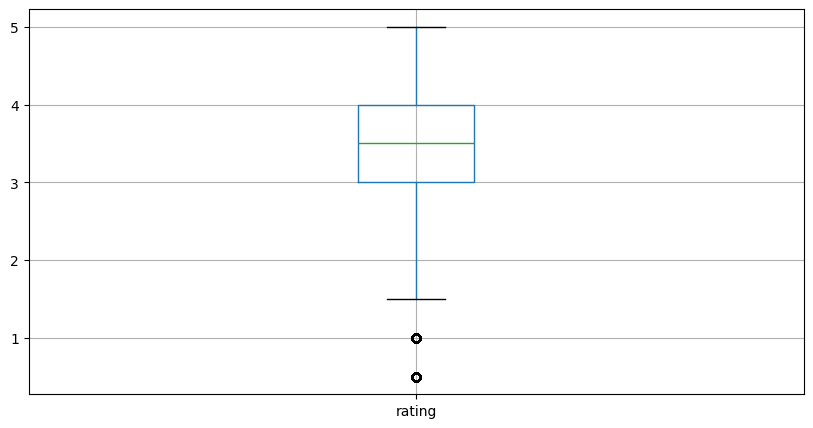

In [73]:
ratings.boxplot(column='rating', figsize=(10,5))

## Slicing out columns 

In [74]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [75]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [81]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [79]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

In [82]:
tags[-10:]

,userId,movieId,tag
465554,138446,3489,visually appealing
465555,138446,7045,family friendly
465556,138446,7045,Scary Movies To See on Halloween
465557,138446,7164,Peter Pan
465558,138446,7164,visually appealing
465559,138446,55999,dragged
465560,138446,55999,Jason Bateman
465561,138446,55999,quirky
465562,138446,55999,sad
465563,138472,923,rise to power


<Axes: xlabel='tag'>

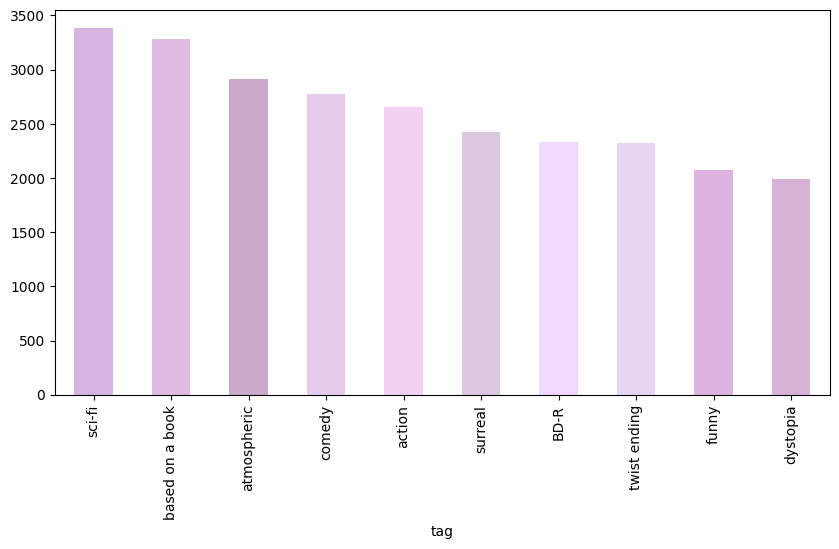

In [91]:
colors=['#D8B4E2','#E0BBE4','#CBAACB','#E6CCEC','#F3D1F4','#DCC6E0','#F0D9FF','#E8D4F3','#DEB3E1','#D7B2D8']
tag_counts[:10].plot(kind='bar', figsize=(10,5), color=colors)